In [1]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']
dir1398 = ['R1398','U1398']
dir1399 = ['R1398','U1398']
dir1400=['R1400','U1400']
dir1401=['R1401','U14U140100']



total_df1=pd.read_csv(f'../{dir1400[0]}/clus_data/{dir1400[0]}_total.csv')
total_df2=pd.read_csv(f'../{dir1400[1]}/clus_data/{dir1400[1]}_total.csv')
total_df = pd.concat([total_df1,total_df2],axis=0)

def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [3]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

Robust scaler

In [4]:
# from sklearn.preprocessing import RobustScaler
# cols_to_norm = ['total_bill','tip']
# data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**L2 norm**

In [5]:
# data_scaled = preprocessing.normalize(total_df, norm='l2')
# data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)

**MaxAbs scaler**

In [6]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)
# for column in data_scaled.columns:
#     plt.subplots()
#     data_scaled[f'{column}'].hist(bins=15)

**min_max scaler**

In [7]:
# scaler = MinMaxScaler()
# data_scaled =scaler.fit_transform(total_df)
# data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)

**be nazar miayad shayad min_max_scaler behtar mtoone to nemodar elbow and Sil k ro namayesh bede**

standard scaler

In [8]:
# scaler = StandardScaler()
# data_scaled =scaler.fit_transform(total_df)
# data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


In [9]:
# data_scaled=total_df

<Axes: >

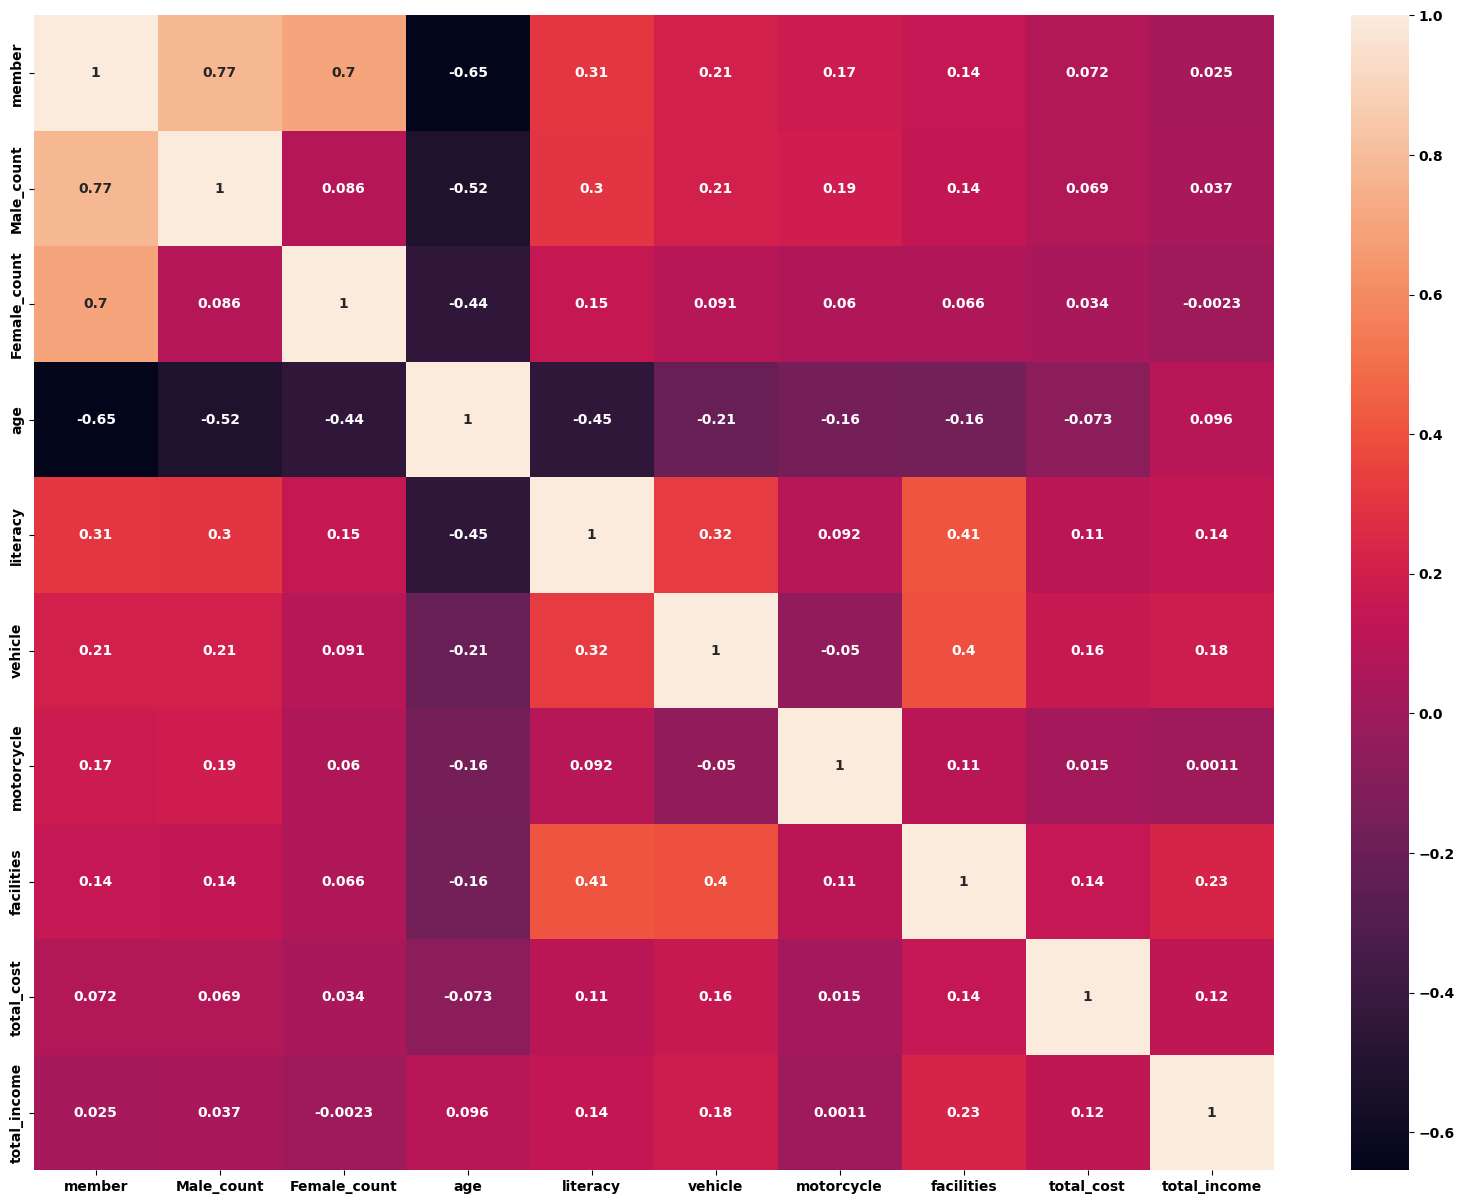

In [10]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

سواد داشتن با میزان ازدواج رابطه عکس داره -.26

In [11]:
# %matplotlib inline
# SSE = []
# for cluster in range(2,20):
#     kmeans = KMeans(n_clusters = cluster, init='k-means++')
#     kmeans.fit(total_df)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# fig, ax = plt.subplots(figsize=(12,6))
# frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# ax.plot(frame['Cluster'], frame['SSE'], marker='o')
# ax.set_xticks(range(0,20))
# ax.grid(True, linestyle='--')
# ax.set_xlabel('Number of clusters')
# ax.set_ylabel('Inertia')
# plt.show()

Clustering after PCA

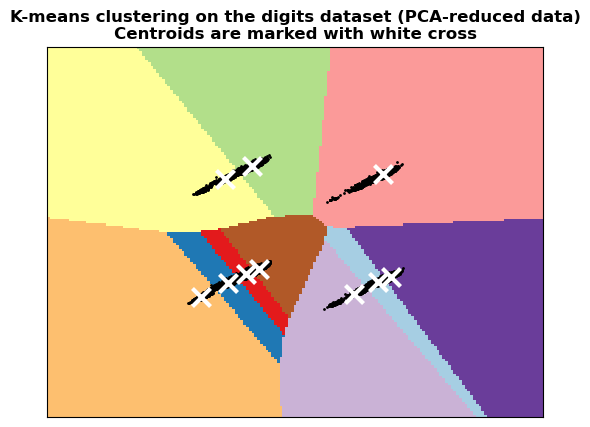

In [12]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [13]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

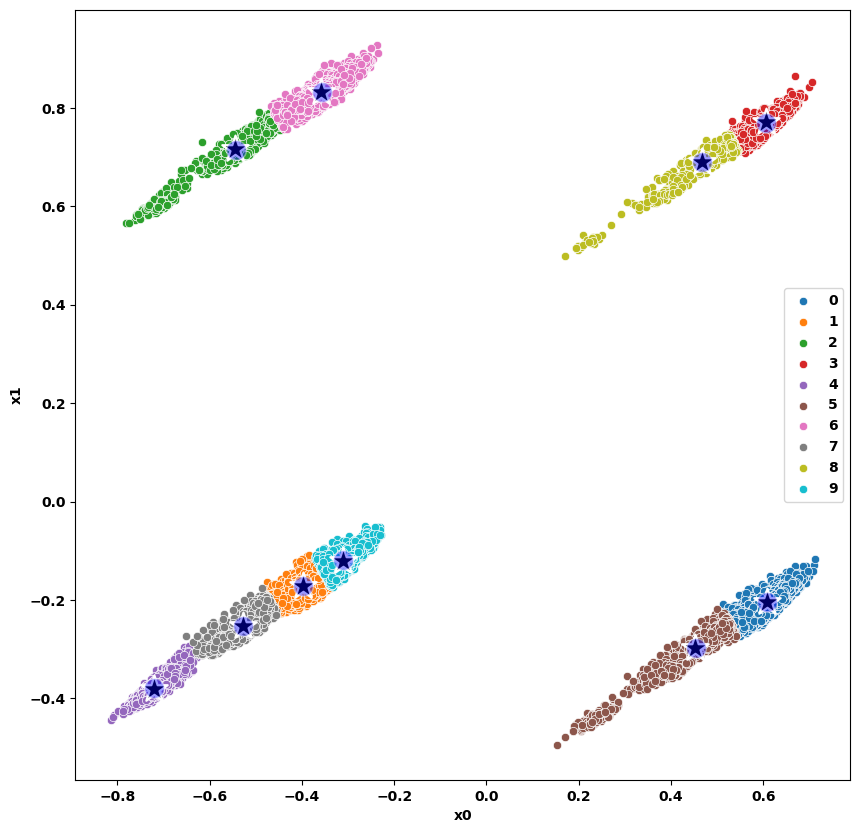

In [14]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [15]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

array([ 8049, 34140, 10997, 21921,  4052, 35614, 28284, 26259,  6446,
        6600], dtype=int64)

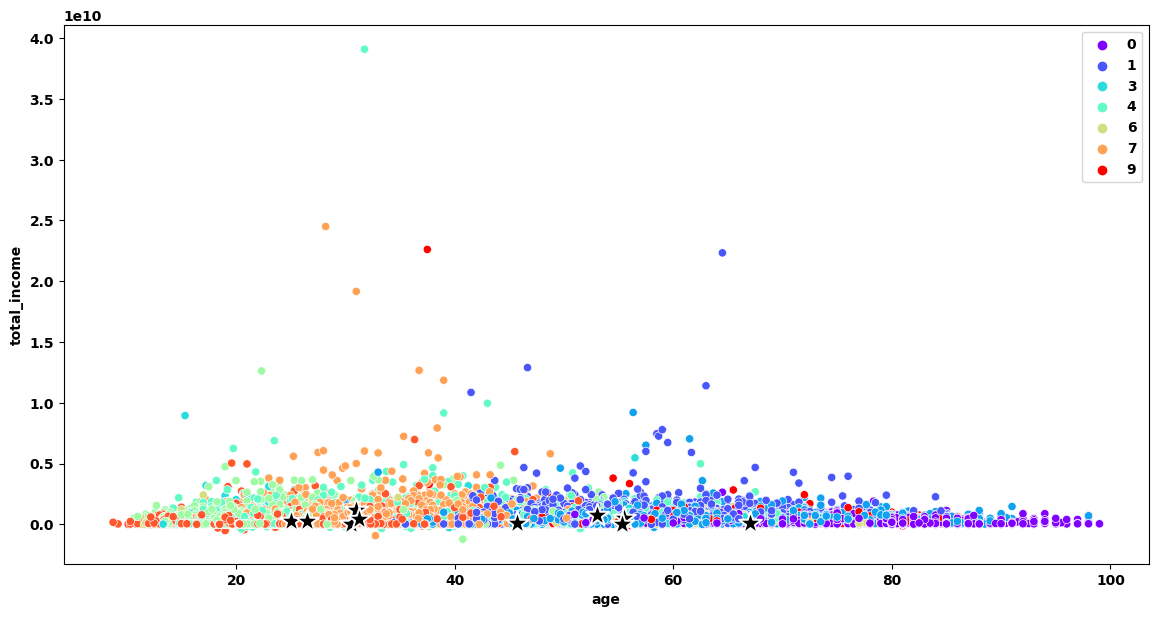

In [17]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [18]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
4052,4,2,2,31.000000,0.750000,1,1,8,164030000.0,1.137480e+09,4
15770,2,1,1,53.000000,1.000000,1,0,7,287593000.0,7.539200e+08,1
10997,2,1,1,55.500000,1.000000,0,0,6,71672000.0,5.357200e+08,2
7889,4,2,2,31.250000,1.000000,1,0,7,246394500.0,4.197800e+08,7
6446,4,2,2,26.500000,0.750000,0,0,6,144627552.0,2.952500e+08,8
17244,4,2,2,25.000000,0.750000,1,0,7,610025552.0,2.702800e+08,5
9914,4,2,2,45.750000,0.500000,0,1,5,41666552.0,1.248400e+08,6
8049,2,1,1,67.000000,0.000000,0,0,4,18415664.0,1.203400e+08,0
6600,3,1,2,55.333333,0.333333,1,0,6,31563164.0,6.234000e+07,9
3551,4,2,2,30.500000,1.000000,0,1,6,143950000.0,4.898800e+07,3


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  13287.619213282673
within cluster sum of squared distance for k=3:  9254.487936483561
within cluster sum of squared distance for k=4:  6932.456466015764
within cluster sum of squared distance for k=5:  4325.458761779141
within cluster sum of squared distance for k=6:  4092.4062629725668
within cluster sum of squared distance for k=7:  3639.7995384206415
within cluster sum of squared distance for k=8:  3364.484509467831
within cluster sum of squared distance for k=9:  3131.3824984211433
within cluster sum of squared distance for k=10:  2768.0235789352873
within cluster sum of squared distance for k=11:  2605.7519628134783
within cluster sum of squared distance for k=12:  2478.725220120751
within cluster sum of squared distance for k=13:  2369.2895265517277
within cluster sum of squared distance for k=14:  2308.2660446390155
within cluster sum of squared distance for k=15:  2269.7729417597648
within cluster sum of squared distance for k=16

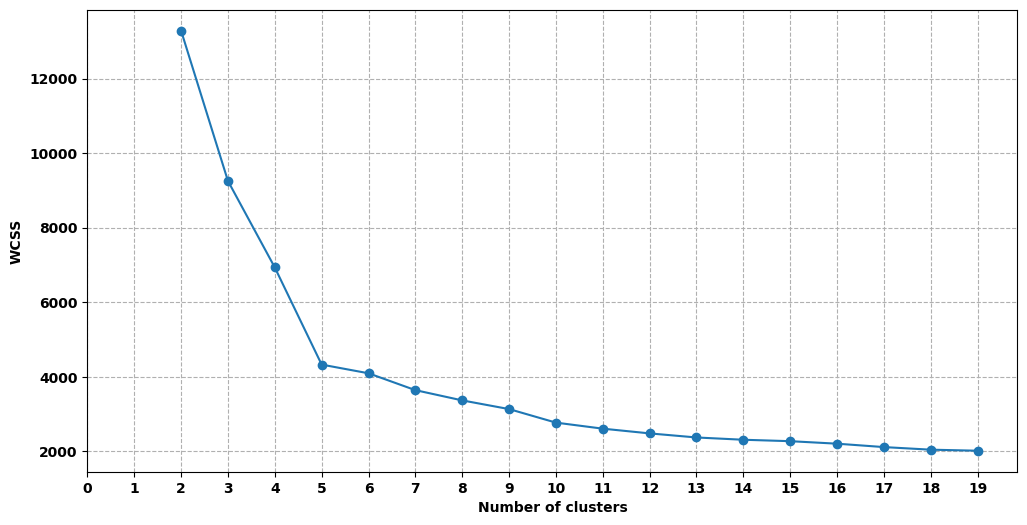

In [19]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


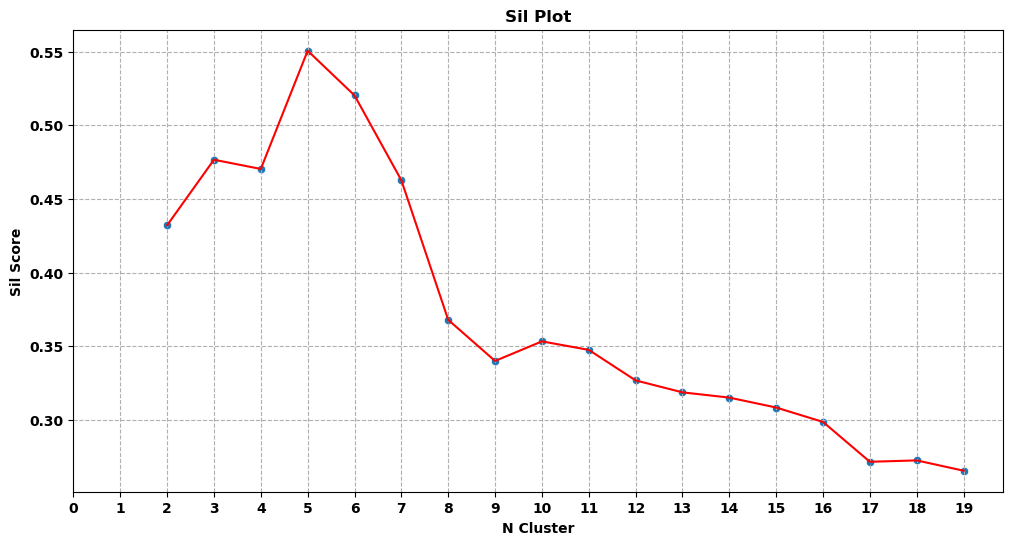

In [20]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

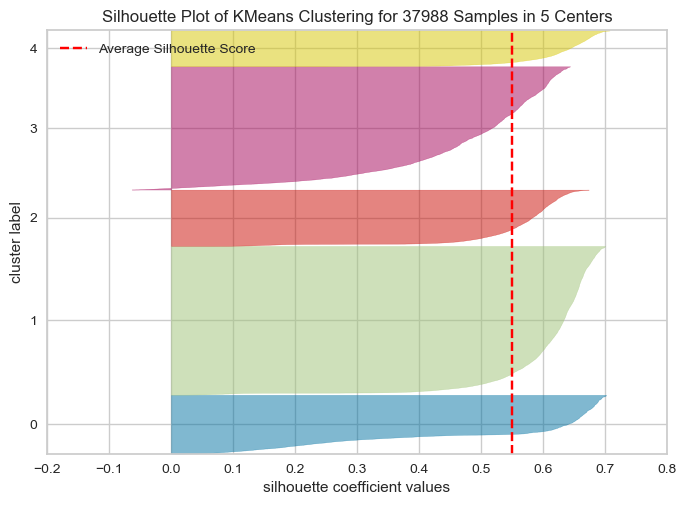

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 37988 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

**Decision Boundary**

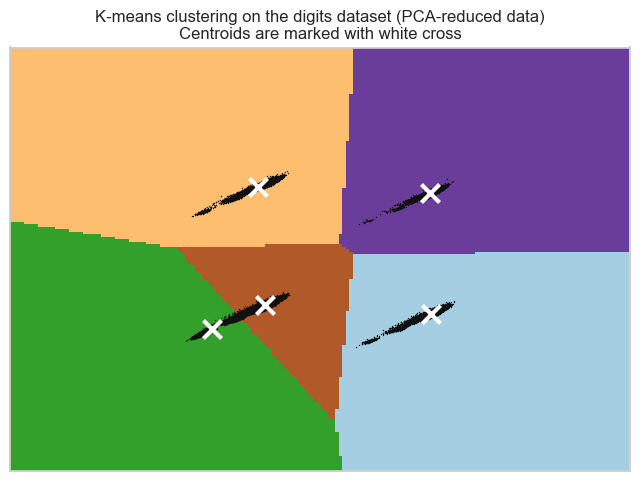

In [22]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [23]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=5,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

array([23138, 27701, 21331,  1373,  4052], dtype=int64)

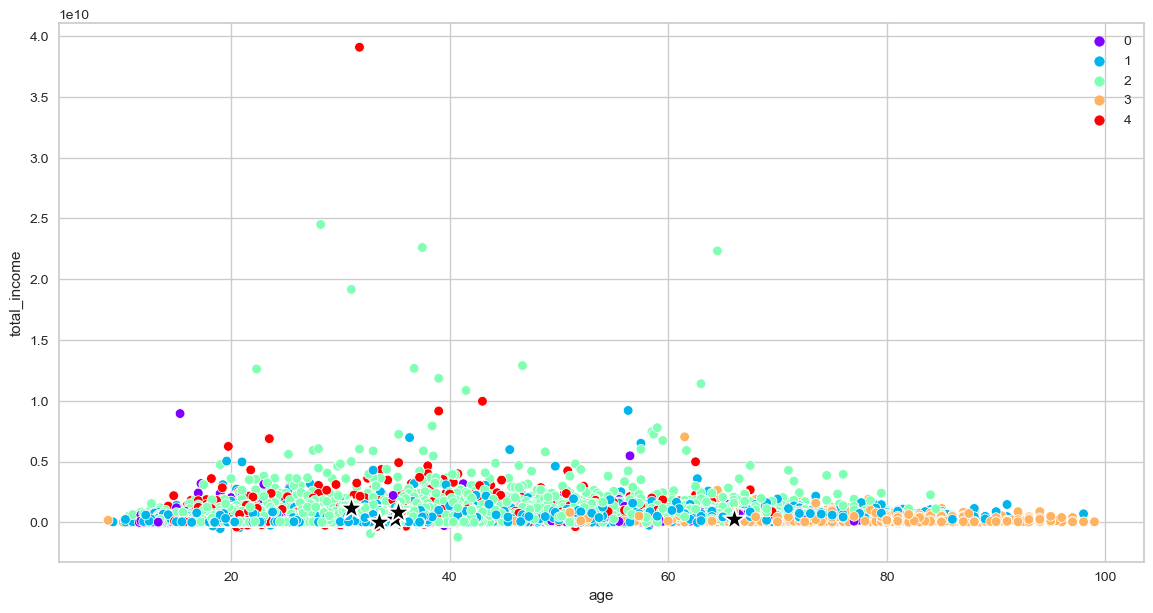

In [24]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [25]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
4052,4,2,2,31.00,0.75,1,1,8,164030000.0,1.137480e+09,4
2961,4,2,2,35.25,0.75,1,0,7,328777500.0,8.694887e+08,2
1373,2,1,1,66.00,0.00,0,0,4,31350000.0,2.740800e+08,3
9331,4,2,2,35.00,0.75,0,0,6,151122000.0,2.389880e+08,1
4768,4,2,2,33.50,0.75,0,1,6,118350052.0,4.647000e+07,0


**bazi hayi baraye behtar peida kardan meghdar k**

**pca for finding k**

In [26]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

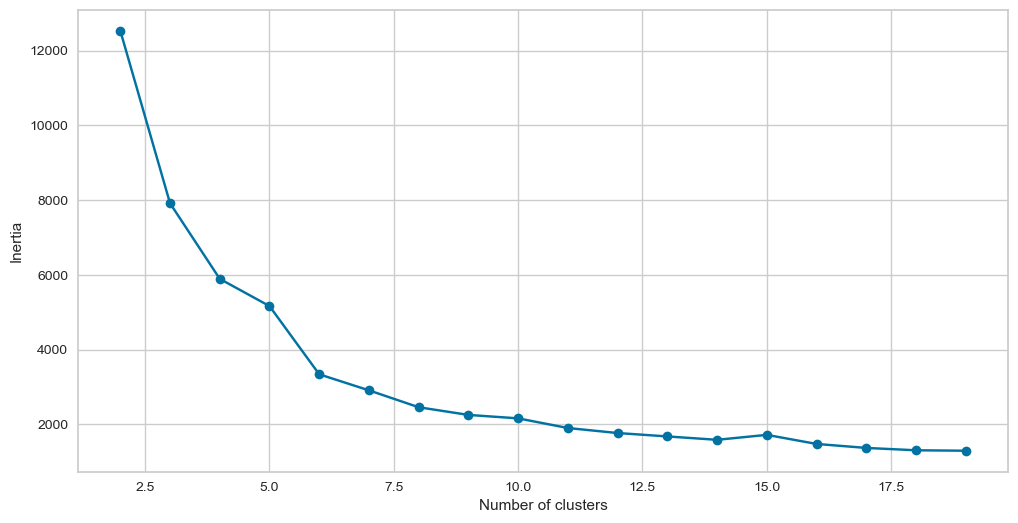

In [27]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


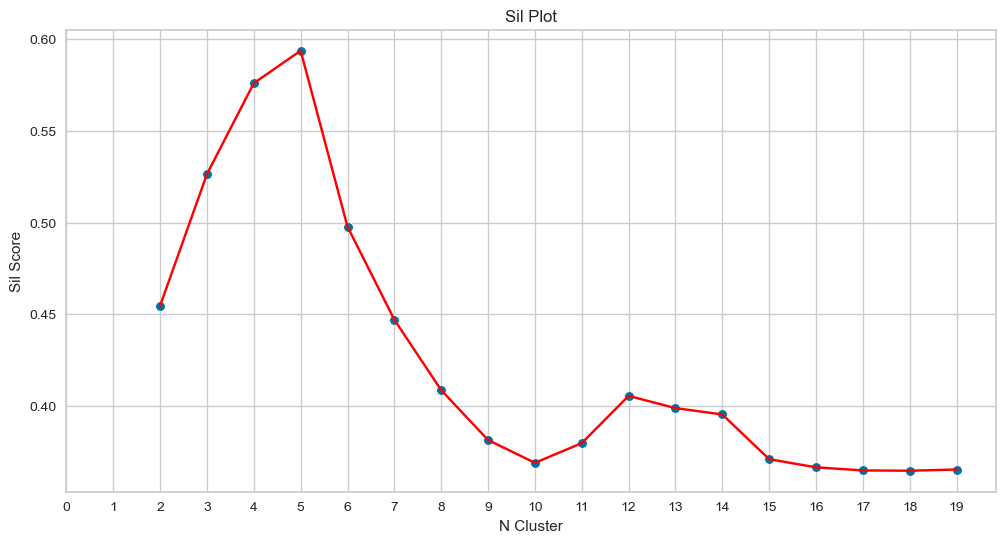

In [28]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

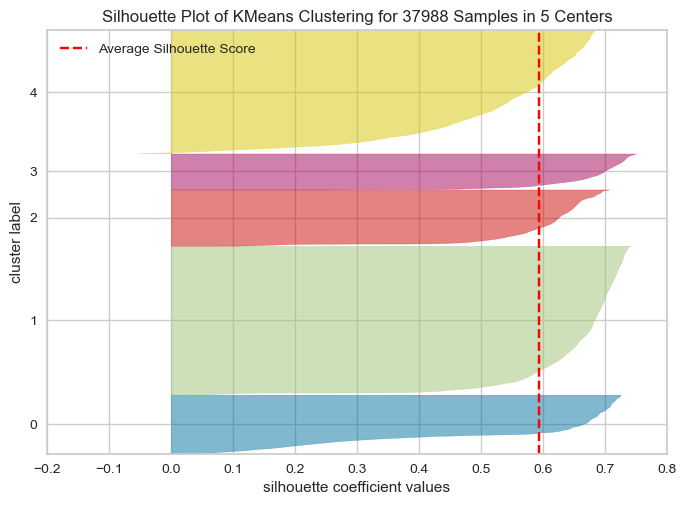

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 37988 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

array([14375, 33762, 34326,  4829, 28068, 11540], dtype=int64)

In [31]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
4829,5,4,1,48.400000,0.800000,1,1,8,1.564524e+08,992700000.0,3
9698,5,2,3,44.600000,0.800000,0,0,6,1.082355e+09,522588000.0,4
15392,5,2,3,48.000000,1.000000,1,0,7,3.643600e+08,422940000.0,1
14375,1,0,1,57.000000,0.000000,0,0,5,3.233250e+07,365460000.0,0
15956,4,1,3,32.250000,0.750000,0,1,6,5.725320e+07,84280000.0,2
11540,3,2,1,24.666667,0.666667,1,0,7,3.330250e+08,16380000.0,5


In [32]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

31.067710223447392

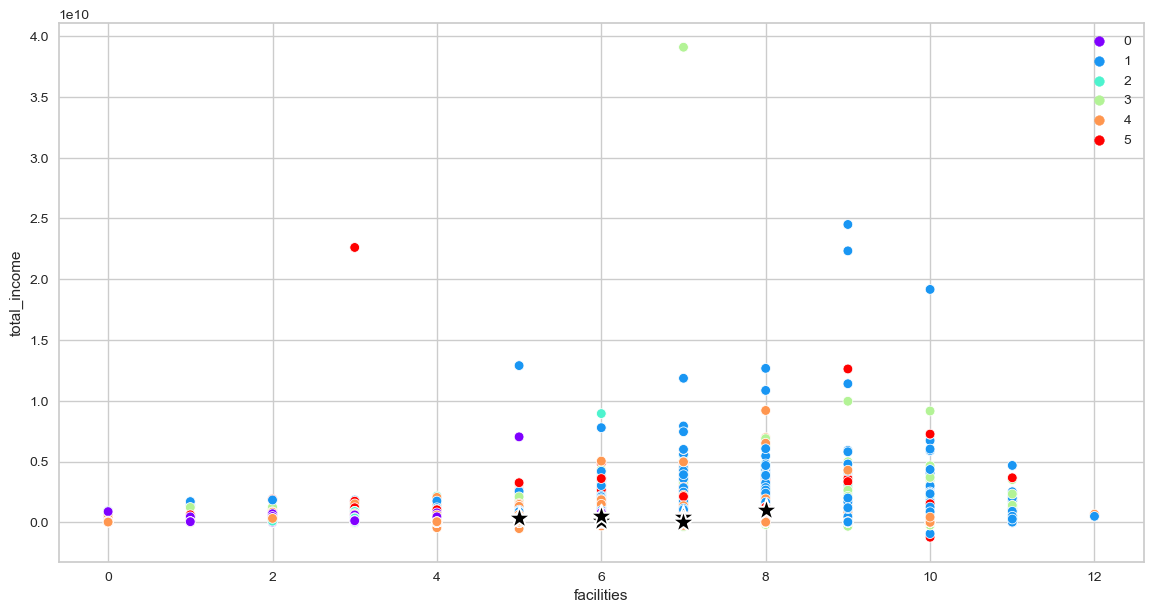

In [33]:
col0='facilities'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [34]:
# clusters_dict = list()
# for i in u_labels:
#     clust_dftotal_df.loc[total_df.Clusters == i , ]




In [35]:
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.metrics import pairwise_distances_argmin_min
# km = KMeans(n_clusters=5).fit(data_scaled)
# closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
# closest

In [36]:
# plt.subplots(figsize=(12,12))
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
# plt.legend()
# plt.show()